# Exercici 1

## Explica quines comandes de Linux Pots fer servir a l’hora d’analitzar logs escrits a fitxer per a:

## Veure contínuament els logs que es van escrivint a un arxiu

### Podemos utilizar el comando **"tail"**, de esta manera **"tail -f archivo.log"**

## Cercar una paraula concreta dintre d’un arxiu de log

### Podemos utilizar el comando **"grep"**, de esta manera **"grep "palabra" archivo.log"**

# Exercici 2

### El concepte logging és molt important en la programació, alhora que està estrictament relacionat amb el tema que estem treballant. Un log en el nostre àmbit vindria a ser un fitxer que conté dades relacionades amb els principals esdeveniments i successos que ocorren en un programa o en un sistema operatiu, així doncs, ja sigui per saber en quin punt hem tingut un error, perquè l'execució del programa no ha anat bé, o quina sèrie de passes ha seguit una persona mentre utilitzava la nostra aplicació i moltes altres utilitats, els Logs són vitals al món del software.

## 2.1 
### En aquest exercici recuperarem el bucle d’exemple que vam fer servir a les sessions de teoria, i configurarem el log per què  els misstatges d’error (isuperiors) vagin a un arxiu, i els missatges d’info (i superiors) vagin a un altre arxiu, mentre que tots els missatges es mostren a la vegada per pantalla. A més, afegirem un nou missatge d’info a l’aplicació  pel que farem servir un logger especial i diferent del que ja hem fet servir, i que tindrà un manegador amb format csv.  Fes commit al repositori cada vegada que tinguis resolt i funcionant una d’aquestes coses:

### · logs d’info a fitxer de logs d’info i logs d’error a fitxer de logs d’error

In [10]:
import logging

# Configuració dels loggers
logger = logging.getLogger("main_logger")
logger.setLevel(logging.DEBUG)  # Nivell base

# Handler per a missatges d'INFO i superiors
info_handler = logging.FileHandler("info.log")
info_handler.setLevel(logging.INFO)
info_formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")
info_handler.setFormatter(info_formatter)

# Handler per a missatges d'ERROR i superiors
error_handler = logging.FileHandler("error.log")
error_handler.setLevel(logging.ERROR)
error_formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")
error_handler.setFormatter(error_formatter)

# Afegir els handlers al logger
logger.addHandler(info_handler)
logger.addHandler(error_handler)

# Exemple de logs
logger.info("Això és un missatge d'info")
logger.error("Això és un missatge d'error")

2024-11-29 17:48:45,905 - INFO - Això és un missatge d'info
2024-11-29 17:48:45,906 - ERROR - Això és un missatge d'error


### · Afegir, a mes del handler de fitxer per a fitxers info, un handler de pantalla amb nivell info

In [11]:
# Handler per a mostrar els logs per pantalla
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(info_formatter)

# Afegir el handler de pantalla al logger
logger.addHandler(console_handler)

# Exemple de logs
logger.info("Aquest missatge es mostra per pantalla i s'escriu al fitxer info.log")

2024-11-29 17:48:47,746 - INFO - Aquest missatge es mostra per pantalla i s'escriu al fitxer info.log
2024-11-29 17:48:47,746 - INFO - Aquest missatge es mostra per pantalla i s'escriu al fitxer info.log


### · Afegir un nou logger amb un nou manegador i un nou formatador a CSV, i afegir una línia al programa que generi aquests logs

In [21]:
import csv
import logging

# Configuració del nou logger
csv_logger = logging.getLogger("csv_logger")
csv_logger.setLevel(logging.INFO)

# Handler per a escriure logs en format CSV
csv_handler = logging.FileHandler("log.csv")
csv_handler.setLevel(logging.INFO)

# Formatador personalitzat en CSV
csv_formatter = logging.Formatter("%(asctime)s, %(levelname)s, %(message)s")
csv_handler.setFormatter(csv_formatter)

# Afegir el handler al nou logger
csv_logger.addHandler(csv_handler)

# Exemple de logs
csv_logger.info("Missatge d'info especial en format CSV")

### · Pujar al repositori una mostra d’unes 20 linies dels fitxers de logs generats per la vostra aplicació: un d’info, un d’error, i un en format CSV

Dentro de esta misma ruta tenemos los archivos **"error.log"**, **"info.log"** y **"log.csv"**

## 2.2
### Que creieu que és millor mostrar els logs per exemple a la terminal durant l'execució del programa o bolcar-los en un fitxer de text?  Afegiu al readme.md del repositori aquesta pregunta amb la seva reposta

Es **mejor combinar ambas estrategias** dependiendo del objetivo:

**Logs en la terminal**: Son útiles durante el desarrollo o monitorización en tiempo real para detectar rápidamente errores y comportamientos inesperados.

**Logs en archivos**: Son esenciales para mantener un registro histórico de los eventos, especialmente para diagnósticos posteriores, auditorías o supervisión automática.

En entornos de producción, es recomendable guardar siempre los logs en archivos y, opcionalmente, utilizar herramientas como tail para monitorizarlos en tiempo real.

## 2.3
### Omple la següent taula amb expmple, avantantges, i desavantatges de les següents maneres de fer logs: (inclou-la al readme.md)

<table style="width:100%; border: 1px solid black; border-collapse: collapse; background-color: white;">
  <tr>
    <th style="width:15%; border: 1px solid black;"></th>
    <th style="width:15%; border: 1px solid black;">Exemple</th>
    <th style="width:30%; border: 1px solid black;">Avantatges</th>
    <th style="width:30%; border: 1px solid black;">Desavantatges</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Fent servir la configuració per defecgte del mòdul logging</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Ejemplo 1</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Ràpid i senzill, ideal per a projectes petits o temporals.</td>
    <td style="border: 1px solid black; word-wrap: break-word;">No escalable, ja que no permet configuracions avançades (com logs en diferents fitxers o nivells per handlers).</td>
    
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Instanciant un objecte logger i parametritzantlo des de programa</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Ejemplo 2</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Gran flexibilitat per configurar handlers i formats dins del codi.</td>
    <td style="border: 1px solid black; word-wrap: break-word;">La configuració al codi pot ser difícil de mantenir o reutilitzar en diferents entorns.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Instanciant un objecte logger a partir d’una configuració emmagatzemada a fitxer</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Ejemplo 3</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Ideal per a projectes grans on es requereix flexibilitat i escalabilitat; fàcil de modificar sense tocar el codi font.</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Requereix fitxers addicionals i una bona documentació per gestionar les configuracions externes.
</td>
  </tr>
</table>

# Ejemplo 1

In [2]:
#Ejemplo 1

import logging
logging.warning('Missatge de prova')

# Ejemplo 2

In [3]:
import logging
logger = logging.getLogger('app_logger')
logger.setLevel(logging.INFO)
file_handler = logging.FileHandler('app.log')
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)
logger.info('Missatge d\'info')

INFO:app_logger:Missatge d'info


# Ejemplo 3

In [5]:
import logging
import logging.config
import json

with open('logging_config.json', 'r') as f:
    config = json.load(f)

logging.config.dictConfig(config)
logger = logging.getLogger('app_logger')
logger.info('Missatge configurat des de JSON')

INFO:app_logger:Missatge configurat des de JSON


## 2.4
### Cerca llibreries de logs en altres llenguatjes (al menys 2, i identifica cóm resolen les següents característiques típiques d’un sistema de logging.  Omple la següent taula, i inclou-la al read-me del repositori:

<table style="width:100%; border: 1px solid black; border-collapse: collapse; background-color: white;">
  <tr>
    <th style="width:10%; border: 1px solid black;"></th>
    <th style="width:25%; border: 1px solid black;">Node.js (Winston)</th>
    <th style="width:25%; border: 1px solid black;">Go (Slog)</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Llenguatge</td>
    <td style="border: 1px solid black; word-wrap: break-word;">JavaScript (Node.js)</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Go</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Nom de la llibreria</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Winston</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Slog</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">És nativa del llenguatge?</td>
    <td style="border: 1px solid black; word-wrap: break-word;">No</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Sí (a partir de Go 1.21)</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">URL per descarregar-se la llibreria</td>
    <td style="border: 1px solid black; word-wrap: break-word;">[Winston on npm](https://www.npmjs.com/package/winston)</td>
    <td style="border: 1px solid black; word-wrap: break-word;">[Slog on GoDoc](https://pkg.go.dev/log/slog)</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Inicialització de l’objecte de logger</td>
    <td style="border: 1px solid black; word-wrap: break-word;">`const logger = winston.createLogger({ level: 'info', transports: [new winston.transports.Console()] });`</td>
    <td style="border: 1px solid black; word-wrap: break-word;">`logger := slog.New(slog.NewJSONHandler(os.Stdout, nil))`</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Nivells de log disponibles</td>
    <td style="border: 1px solid black; word-wrap: break-word;">error, warn, info, debug, verbose, http, silly</td>
    <td style="border: 1px solid black; word-wrap: break-word;">debug, info, warn, error</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Mètode per fer log</td>
    <td style="border: 1px solid black; word-wrap: break-word;">`logger.info('Message')`</td>
    <td style="border: 1px solid black; word-wrap: break-word;">`logger.Info("Message")`</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Tipus de manegadors (pantalla, fitxer…) Identificar els seus noms a la API</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Console, File, HTTP</td>
    <td style="border: 1px solid black; word-wrap: break-word;">TextHandler, JSONHandler</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; word-wrap: break-word;">Opcions de format</td>
    <td style="border: 1px solid black; word-wrap: break-word;">Format JSON, Format simple, Custom formats</td>
    <td style="border: 1px solid black; word-wrap: break-word;">JSON, Logfmt, Custom formats</td>
  </tr>
</table>

# Exercici 3

## Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació que permetés a un treballador de forma senzilla introduir mitjançant un fitxer json, txt csv o similar introduir unes dades que escollim i li elaborem una sèrie de gràfiques.

## Abans d’això, caldrà informar-se sobre les següents eines, alguna de les quals potser ja coneixeu.

## Pandas

Pandas es una **librería de Python** muy utilizada para el trabajo con datos, especialmente cuando se trata de datos tabulares. Esta librería **facilita la manipulación y el análisis de datos, con estructuras como DataFrames** que permiten cargar datos de **archivos CSV, Excel, JSON**, etc., y manipularlos de forma muy eficiente.

### Funcionalidad:

**Lectura y escritura de archivos**: Pandas permite leer archivos CSV, JSON, Excel y muchos otros formatos. Esto nos permite cargar datos de forma fácil y rápida en la aplicación.

**Manipulación de datos**: Permite filtrar, ordenar, agrupar y transformar los datos.

**Cálculos y agregaciones**: Puedes calcular medias, sumas, máximos, mínimos y otras operaciones matemáticas en los datos.

**Gestión de valores nulos**: Tiene funcionalidades para gestionar valores perdidos o nulos en los datos.

## Ejemplo


In [2]:
import pandas as pd

# Llegim un fitxer CSV
df = pd.read_csv('log.csv')

# Visualitzem les primeres 5 files
print(df.head())

   2024-11-29 17:48:05  427   INFO   Missatge d'info especial en format CSV
0  2024-11-29 17:49:00  908   INFO   Missatge d'info especial en format CSV
1  2024-11-29 17:49:00  908   INFO   Missatge d'info especial en format CSV
2  2024-11-29 17:49:18  479   INFO   Missatge d'info especial en format CSV
3  2024-11-29 17:49:18  479   INFO   Missatge d'info especial en format CSV
4  2024-11-29 17:49:18  479   INFO   Missatge d'info especial en format CSV


Esta herramienta será fundamental para leer los datos de los archivos introducidos por el trabajador y para prepararlos antes de generar los gráficos.

## Jupyter Notebook

Jupyter Notebook es una **herramienta de código abierto** que permite **crear documentos interactivos con código ejecutable**, visualizaciones y texto. Es muy utilizada para el **análisis de datos**, puesto que permite **combinar código Python con notas y gráficas en un mismo entorno**.

## Funcionalidad:

**Ejecución interactiva de código**: Permite escribir y ejecutar código Python dentro del mismo documento.

**Visualización de gráficas**: Es compatible con bibliotecas como Matplotlib, Seaborn y Plotly, que se pueden utilizar para generar gráficas en tiempo real.

**Documentación**: Permite escribir explicaciones, describir los pasos realizados y añadir capturas de pantalla para documentar el trabajo realizado.

## Ejemplo

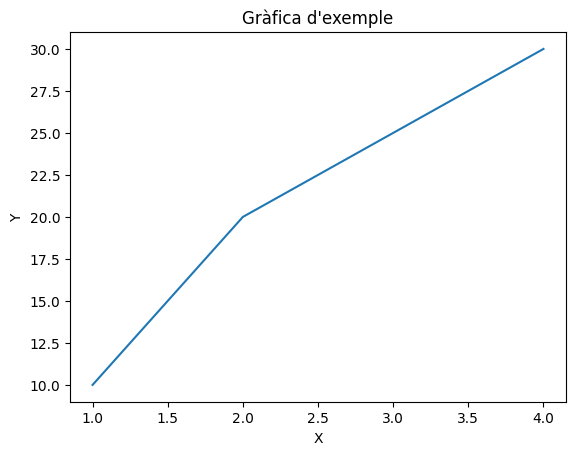

In [3]:
import matplotlib.pyplot as plt

# Generem una gràfica simple
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gràfica d\'exemple')
plt.show()

Este entorno será útil para probar la aplicación y ver las gráficas generadas de forma visual e interactiva.

## Reportlab

ReportLab es una **librería de Python** para **generar documentos en formato PDF de forma programática**. Esta herramienta puede ser útil para g**enerar informes finales con los gráficos y datos procesados**, así como para **guardar y exportar los resultados de la aplicación** en un formato documentable.

## Funcionalidad:

**Generación de PDFs**: Permite crear documentos PDF desde cero con texto, gráficas e imágenes.

**Personalización**: Puedes personalizar completamente el aspecto del PDF, como la tipografía, los tamaños de las celdas, las tablas, e incluir gráficas generadas 
previamente con otras bibliotecas.

**Integración con otras bibliotecas**: Se puede integrar fácilmente con Pandas y Matplotlib para incluir datos y gráficas generadas en los informes PDF.

## Ejemplo 

In [5]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Creem un fitxer PDF
c = canvas.Canvas("informe.pdf", pagesize=letter)
c.drawString(100, 750, "Informe de Dades")
c.save()

Esta herramienta será útil para generar informes en PDF con las gráficas de la aplicación, de modo que el trabajador pueda exportar sus resultados de forma formal y profesional.

## Conclusion

### Entrada de datos: Utilizaremos Pandas para leer los archivos de datos (CSV, JSON, TXT, etc.) introducidos por el trabajador.

### Análisis y manipulación de datos: Con Pandas, realizaremos los cálculos necesarios y la manipulación de los datos para prepararlos para su visualización.

### Generación de gráficas: Utilizaremos Matplotlib o Seaborn dentro de Jupyter Notebook para generar gráficas interactivas.

### Generación de informes: Con ReportLab, generaremos los informes en formato PDF con los datos y gráficas generadas.

### Este conjunto de herramientas nos permitirá crear una aplicación eficaz para el trabajador que le permita gestionar y visualizar los datos de forma sencilla y efectiva.

# Ejercicio 4

## En aquest exercici caldrà generar per exemple un CSV amb les dades que treballareu. RECORDAR que el CSV treballa amb comes.

## Restricciones: Minimo 20 personas (registros) con 5 columnas de datos

In [8]:
import pandas as pd

# Creem un diccionari amb les dades, incloent la nova columna "Telèfon"
data = {
    'Nom': ['Joan Pérez', 'Anna Garcia', 'Marc López', 'Marta Sánchez', 'Lluís Costa', 'Laura Ruiz', 'Pau Vila', 'Carla Gómez', 'Jordi Fernández', 'Sofia Martín', 
            'Xavier Ruiz', 'Teresa Pérez', 'Diego Sánchez', 'Sandra Moreno', 'Raúl López', 'Julia Ruiz', 'Enric Soler', 'Clara García', 'Miquel Vila', 'Enrique Estudillos'],
    'Edat': [30, 25, 40, 35, 50, 28, 22, 33, 44, 29, 37, 31, 45, 23, 32, 34, 38, 26, 41, 20],
    'Ciutat': ['Barcelona', 'Madrid', 'València', 'Sevilla', 'Girona', 'Lleida', 'Tarragona', 'Barcelona', 'Madrid', 'València', 'Lleida', 'Sevilla', 'Girona', 'Barcelona', 'Tarragona', 'Lleida', 'Madrid', 'València', 'Girona', 'Barcelona'],
    'Correu electrònic': ['joan.perez@email.com', 'anna.garcia@email.com', 'marc.lopez@email.com', 'marta.sanchez@email.com', 'lluis.costa@email.com', 'laura.ruiz@email.com', 
                          'pau.vila@email.com', 'carla.gomez@email.com', 'jordi.fernandez@email.com', 'sofia.martin@email.com', 'xavier.ruiz@email.com', 'teresa.perez@email.com',
                          'diego.sanchez@email.com', 'sandra.moreno@email.com', 'raul.lopez@email.com', 'julia.ruiz@email.com', 'enric.soler@email.com', 'clara.garcia@email.com', 'miquel.vila@email.com', 'enrique.estudillos@email.com'],
    'Data de naixement': ['1994-06-12', '1999-02-20', '1984-03-15', '1989-11-10', '1974-08-05', '1996-01-01', '2002-04-18', '1991-12-05', '1980-07-30', '1995-09-22', 
                          '1987-03-09', '1993-06-25', '1979-01-17', '2001-05-12', '1992-02-23', '1990-09-12', '1986-08-20', '1998-03-14', '1983-11-30', '2004-10-18'],
    'Telèfon': ['678123456', '634567890', '612345678', '650987654', '666112233', '612344455', '609876543', '623456789', '647812345', '673456781',
                '615678912', '677123456', '635478912', '666345678', '640123456', '623123456', '612987654', '678765432', '622345678', '637050571']
}

# Creem el DataFrame de pandas
df = pd.DataFrame(data)

# Guardem el DataFrame com a fitxer CSV
df.to_csv('dades_persones_actualitzat.csv', index=False)

# Llegim un fitxer CSV
df = pd.read_csv('dades_persones_actualitzat.csv')

# Visualitzem les primeres 5 files
print(df)

                   Nom  Edat     Ciutat             Correu electrònic  \
0           Joan Pérez    30  Barcelona          joan.perez@email.com   
1          Anna Garcia    25     Madrid         anna.garcia@email.com   
2           Marc López    40   València          marc.lopez@email.com   
3        Marta Sánchez    35    Sevilla       marta.sanchez@email.com   
4          Lluís Costa    50     Girona         lluis.costa@email.com   
5           Laura Ruiz    28     Lleida          laura.ruiz@email.com   
6             Pau Vila    22  Tarragona            pau.vila@email.com   
7          Carla Gómez    33  Barcelona         carla.gomez@email.com   
8      Jordi Fernández    44     Madrid     jordi.fernandez@email.com   
9         Sofia Martín    29   València        sofia.martin@email.com   
10         Xavier Ruiz    37     Lleida         xavier.ruiz@email.com   
11        Teresa Pérez    31    Sevilla        teresa.perez@email.com   
12       Diego Sánchez    45     Girona       diego

# Ejercicio 5 y 6



Análisis de Datos: Informe de Personas

1. Distribución de Edades
Edad media: 33.15 años
Edad mínima: 20 años
Edad máxima: 50 años

2. Análisis de la Ciudad
Barcelona: 4 personas
Madrid: 3 personas
València: 3 personas
Girona: 3 personas
Lleida: 3 personas
Sevilla: 2 personas
Tarragona: 2 personas

3. Tendencia de Correo Electrónico
email.com: 20 correos

4. Análisis de Teléfonos
6123: 2 números
6781: 1 números
6345: 1 números
6509: 1 números
6661: 1 números
6098: 1 números
6234: 1 números
6478: 1 números
6734: 1 números
6156: 1 números
6771: 1 números
6354: 1 números
6663: 1 números
6401: 1 números
6231: 1 números
6129: 1 números
6787: 1 números
6223: 1 números
6370: 1 números

5. Comparación de Edad por Ciudad
Barcelona: 26.50 años
Girona: 45.33 años
Lleida: 33.00 años
Madrid: 35.67 años
Sevilla: 33.00 años
Tarragona: 27.00 años
València: 31.67 años



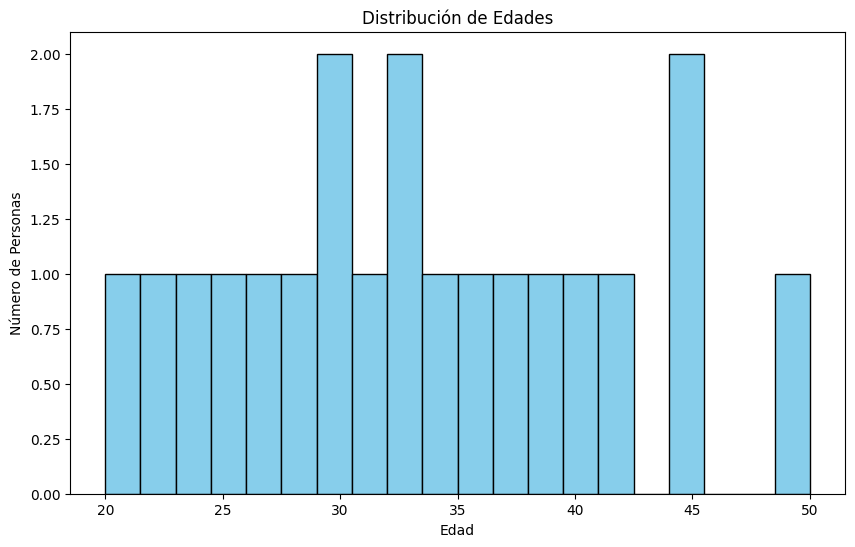

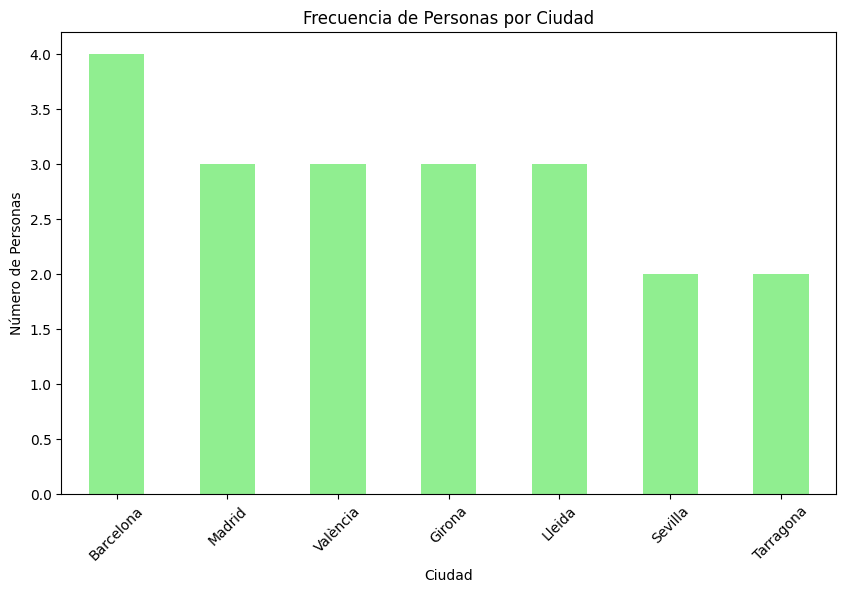

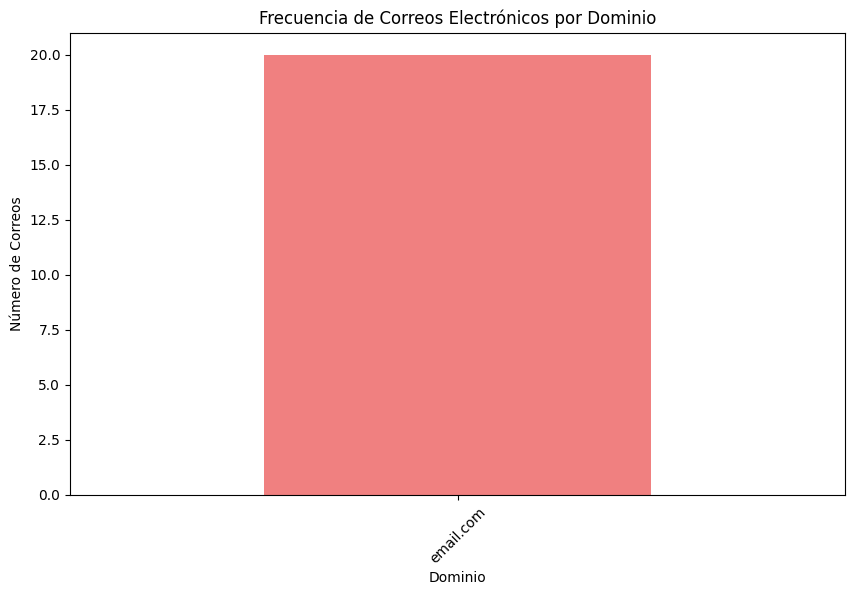

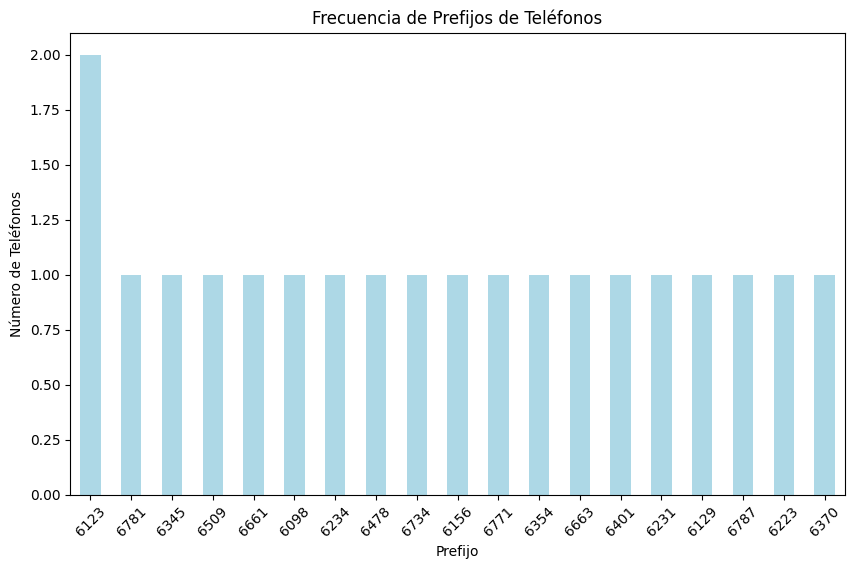

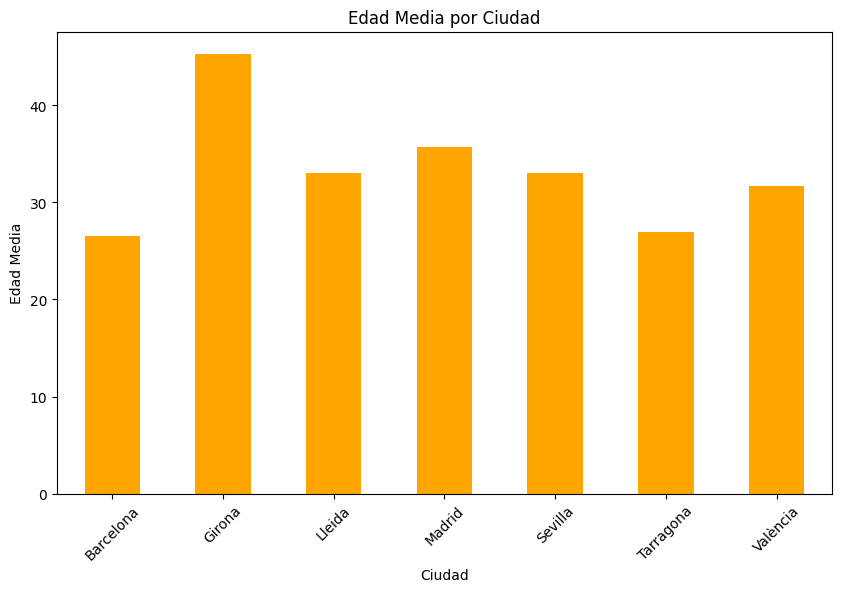

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leemos el archivo CSV
df = pd.read_csv('dades_persones_actualitzat.csv')

# Cálculo de la media y el rango de edades
edad_media = df['Edat'].mean()
edad_minima = df['Edat'].min()
edad_maxima = df['Edat'].max()

# Contar las personas por ciudad
ciudad_frecuencia = df['Ciutat'].value_counts()

# Extraer el dominio del correo electrónico
df['Dominio'] = df['Correu electrònic'].str.split('@').str[1]
dominio_frecuencia = df['Dominio'].value_counts()

# Visualización de los primeros 4 dígitos de los teléfonos
df['Telèfon'] = df['Telèfon'].astype(str) 
df['Prefijo'] = df['Telèfon'].str[:4]
prefijo_frecuencia = df['Prefijo'].value_counts()

# Media de edad por ciudad
edad_media_por_ciutat = df.groupby('Ciutat')['Edat'].mean()

# Mostrar la información en consola
print("Análisis de Datos: Informe de Personas\n")

# 1. Distribución de Edades
print("1. Distribución de Edades")
print(f"Edad media: {edad_media:.2f} años")
print(f"Edad mínima: {edad_minima} años")
print(f"Edad máxima: {edad_maxima} años")
print()

# 2. Análisis de la Ciudad
print("2. Análisis de la Ciudad")
for ciudad, frecuencia in ciudad_frecuencia.items():
    print(f"{ciudad}: {frecuencia} personas")
print()

# 3. Tendencia de Correo Electrónico
print("3. Tendencia de Correo Electrónico")
for dominio, frecuencia in dominio_frecuencia.items():
    print(f"{dominio}: {frecuencia} correos")
print()

# 4. Análisis de Teléfonos
print("4. Análisis de Teléfonos")
for prefijo, frecuencia in prefijo_frecuencia.items():
    print(f"{prefijo}: {frecuencia} números")
print()

# 5. Comparación de Edad por Ciudad
print("5. Comparación de Edad por Ciudad")
for ciudad, edad_media_ciudad in edad_media_por_ciutat.items():
    print(f"{ciudad}: {edad_media_ciudad:.2f} años")
print()

# Graficar los resultados
# Graficar la distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(df['Edat'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Número de Personas')
plt.show()

# Graficar la frecuencia de las ciudades
plt.figure(figsize=(10, 6))
ciudad_frecuencia.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia de Personas por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.show()

# Graficar la frecuencia de dominios de correo electrónico
plt.figure(figsize=(10, 6))
dominio_frecuencia.plot(kind='bar', color='lightcoral')
plt.title('Frecuencia de Correos Electrónicos por Dominio')
plt.xlabel('Dominio')
plt.ylabel('Número de Correos')
plt.xticks(rotation=45)
plt.show()

# Graficar la frecuencia de los prefijos de teléfono
plt.figure(figsize=(10, 6))
prefijo_frecuencia.plot(kind='bar', color='lightblue')
plt.title('Frecuencia de Prefijos de Teléfonos')
plt.xlabel('Prefijo')
plt.ylabel('Número de Teléfonos')
plt.xticks(rotation=45)
plt.show()

# Graficar la media de edad por ciudad
plt.figure(figsize=(10, 6))
edad_media_por_ciutat.plot(kind='bar', color='orange')
plt.title('Edad Media por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Edad Media')
plt.xticks(rotation=45)
plt.show()

# Ejercicio 7

## Analisis 1

Este análisis muestra cómo se distribuyen las edades en el conjunto de datos. La edad media de 33.15 años indica que la mayoría de las personas en el conjunto de datos tienen una edad cercana a este valor. La edad mínima de 20 años y la edad máxima de 50 años nos dan una idea de los rangos de edad que componen este grupo de personas. La diferencia entre la edad mínima y máxima también sugiere que el conjunto de datos abarca a un grupo de personas relativamente diverso en términos de edad.

## Analisis 2

Este análisis muestra la distribución de las personas por ciudad. En este caso, Barcelona tiene la mayor representación con 4 personas, mientras que otras ciudades como Madrid, València, Girona, y Lleida tienen 3 personas cada una. Las ciudades con menor representación son Sevilla y Tarragona, con solo 2 personas cada una. Este análisis puede ser útil para ver cómo están distribuidas geográficamente las personas del conjunto de datos, lo que podría tener implicaciones en otros análisis, como los relacionados con la edad, el correo electrónico o los teléfonos.

## Analisis 3

Este análisis muestra la frecuencia de dominios en las direcciones de correo electrónico de las personas en el conjunto de datos. En este caso, todos los correos electrónicos tienen el dominio email.com, lo que indica que el 100% de las personas en el conjunto de datos utilizan este dominio para sus correos electrónicos. Este tipo de análisis es útil cuando se desea entender si hay alguna tendencia o uniformidad en los dominios de los correos electrónicos de un grupo de personas. En este caso, la uniformidad sugiere que todas las personas provienen de una fuente común o utilizan el mismo servicio de correo.

## Analisis 4

Este análisis muestra la frecuencia de los primeros 4 dígitos de los números de teléfono, lo que puede dar información sobre la región o el operador asociado a esos números. En este caso, el prefijo 6123 aparece 2 veces, lo que indica que hay al menos dos personas con números que comienzan con esos dígitos. Los demás prefijos solo aparecen una vez, lo que sugiere que no hay demasiada repetición en el número de teléfono, lo cual es común en muchas bases de datos. Este tipo de análisis puede ser útil para identificar patrones en los números de teléfono y puede relacionarse con áreas geográficas o proveedores de servicios.

## Analisis 5

Este análisis calcula la edad media por ciudad, lo que permite comparar la edad promedio de las personas que viven en diferentes ciudades. Los resultados muestran que Girona tiene la edad media más alta (45.33 años), lo que sugiere que las personas en Girona tienden a ser más grandes en comparación con otras ciudades. Por otro lado, Barcelona tiene la edad media más baja (26.50 años), lo que podría indicar que en Barcelona hay una mayor representación de personas más jóvenes. Las demás ciudades tienen edades medias que varían entre los 27 y 35 años, lo que sugiere una distribución de edades relativamente homogénea en esas localidades.

Es útil para identificar posibles correlaciones entre la edad y la ciudad, lo que podría ser relevante en otros contextos, como estudios de mercado, análisis demográficos o estudios sobre el comportamiento de grupos en diferentes ciudades.